In [58]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# MLP 모델 정의
class Net(nn.Module):
    def __init__(self, dropout_rate=0.2):
        super(Net, self).__init__()

        self.l1 = nn.Linear(32 * 32 * 3, 2048) #입력층
        self.bn1 = nn.BatchNorm1d(2048) #batch normalization
        self.dropout1 = nn.Dropout(dropout_rate) #dropout
        self.l2 = nn.Linear(2048, 1024) #은닉층1
        self.bn2 = nn.BatchNorm1d(1024)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.l3 = nn.Linear(1024, 512) #은닉층2
        self.bn3 = nn.BatchNorm1d(512)
        self.dropout3 = nn.Dropout(dropout_rate)
        self.l4 = nn.Linear(512, 256) #은닉층3
        self.bn4 = nn.BatchNorm1d(256)
        self.dropout4 = nn.Dropout(dropout_rate)
        self.l5 = nn.Linear(256, 10) #은닉층4

    def forward(self, x):
        #활성화 함수 적용
        x = x.view(-1, 32 * 32 * 3) #input을 (batch_size, 32*32*3)으로 flatten
        # x = self.bn1(F.relu(self.l1(x)))
        # x = self.bn2(F.relu(self.l2(x)))
        # x = self.bn3(F.relu(self.l3(x)))
        # x = self.bn4(F.relu(self.l4(x)))
        # x = self.l5(x)
        x = self.dropout1(self.bn1(F.relu(self.l1(x)))) #dropout 적용 버전
        x = self.dropout2(self.bn2(F.relu(self.l2(x))))
        x = self.dropout3(self.bn3(F.relu(self.l3(x))))
        x = self.dropout4(self.bn4(F.relu(self.l4(x))))
        x = self.l5(x)
        return x #output (batch_size, 10) 반환


In [60]:
from google.colab import drive
drive.mount('/content/mai_drive')    # 구글드라이브 마운트

device = 'cuda' if torch.cuda.is_available() else 'cpu'     # nvidia gpu / 아니면 cpu
print(f'Training MNIST Model on {device}\n{"="*44}')

Drive already mounted at /content/mai_drive; to attempt to forcibly remount, call drive.mount("/content/mai_drive", force_remount=True).
Training MNIST Model on cuda


In [61]:
from torchvision import datasets, transforms

#이미지 데이터 전처리
transform = transforms.Compose([
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

In [62]:
batch_size = 128

In [63]:
# CIFAR10 데이터셋 다운로드 및 DataLoader 생성
train_dataset = datasets.CIFAR10(root='/content/mai_drive/My Drive/mai1/CIFAR10_data/', 
                                        train=True, 
                                        transform=transform,
                                        download=True)

test_dataset = datasets.CIFAR10(root='/content/mai_drive/My Drive/mai1/CIFAR10_data/',
                                        train=False,
                                        transform=transform)

from torch.utils import data

train_loader = data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)


test_loader = data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified


In [64]:
train_dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /content/mai_drive/My Drive/mai1/CIFAR10_data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [65]:
test_dataset

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: /content/mai_drive/My Drive/mai1/CIFAR10_data/
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

tensor(2)


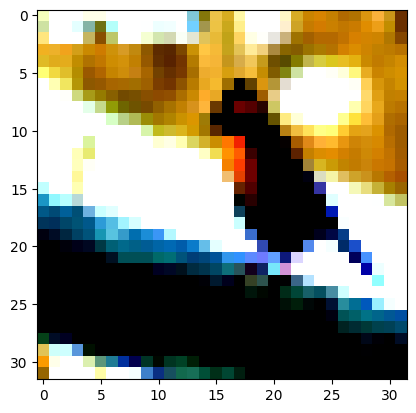

In [77]:
import matplotlib.pyplot as plt

for i, (data, target) in enumerate(train_loader):
  if i == 1:
    break
  plt.imshow(data[1].permute(1,2,0))
  print(target[1])

In [67]:
#model = Net()
model = Net(dropout_rate=0.2) #dropout 적용 버전
model.to(device)

from torch import optim

# 손실 함수와 optimizer 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.75)
#optimizer = optim.RMSprop(model.parameters(), lr=0.01, momentum=0.75)
#optimizer = optim.Adam(model.parameters(), lr=0.01)
#optimizer = optim.Adagrad(model.parameters(), lr=0.01)

In [59]:
testmodel = Net()
testmodel

Net(
  (l1): Linear(in_features=3072, out_features=2048, bias=True)
  (bn1): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (l2): Linear(in_features=2048, out_features=1024, bias=True)
  (bn2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (l3): Linear(in_features=1024, out_features=512, bias=True)
  (bn3): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout3): Dropout(p=0.2, inplace=False)
  (l4): Linear(in_features=512, out_features=256, bias=True)
  (bn4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout4): Dropout(p=0.2, inplace=False)
  (l5): Linear(in_features=256, out_features=10, bias=True)
)

In [68]:
for i in model.parameters():
  print(i)

Parameter containing:
tensor([[ 1.7388e-02, -1.1586e-02, -7.3518e-03,  ...,  9.1386e-04,
         -1.1061e-02, -5.2808e-03],
        [ 9.7528e-04,  3.8413e-03,  6.2769e-04,  ...,  1.2183e-02,
          7.4504e-05, -7.8115e-03],
        [ 9.0168e-03,  9.1059e-03,  1.0660e-02,  ...,  1.2456e-02,
         -1.1869e-02, -1.0963e-02],
        ...,
        [ 2.7540e-03, -4.9200e-03, -1.0426e-02,  ..., -1.3033e-02,
          1.7859e-02, -6.5316e-03],
        [-5.3730e-03,  1.1660e-02,  3.5974e-03,  ...,  1.4663e-02,
          9.2189e-03, -3.0953e-03],
        [-1.1480e-03,  3.2907e-03,  2.0154e-03,  ..., -3.3174e-03,
          1.5188e-02,  4.4263e-03]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([ 0.0032, -0.0002,  0.0052,  ..., -0.0029, -0.0061,  0.0111],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([1., 1., 1.,  ..., 1., 1., 1.], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([0., 0., 0.,  ..., 0., 0., 0.], device='cuda:0'

In [69]:
def count_param1(model):
  cnt = 0
  for p in list(model.parameters()):    # p.size() <- torch.size([128,3,3,3]) 이런 꼴이니까 전부 다 곱하면 parameter 숫자 나옴
    cnt += torch.prod(torch.tensor(p.size()))  
  return cnt

count_param1(model)

tensor(9058058)

In [70]:
#plot 기능을 위한 list 정의
list_train_loss=[]
list_train_accuracy=[]

# 학습과 테스트 함수 정의
def train(epoch):
    model.train()
    correct = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        outputs = model(data)

        loss = criterion(outputs, target)
        
        loss.backward()

        optimizer.step()

        if batch_idx %100 == 0:
           print(f'train epoch {epoch} | loss {loss.item()} | batch status {batch_idx}/{len(train_loader)}')

        idx = outputs.argmax(1, keepdim=True)      # (n,1) 크기  <- target텐서의 크기 (n)과 다르다
        idx = idx.squeeze()     # 1인 차원 제거 -> (n) 크기 

        correct += (target == idx).sum()

    list_train_loss.append(loss.item())
    list_train_accuracy.append(correct.cpu().numpy()/len(train_loader.dataset))
    

In [71]:
list_test_loss=[]
list_test_accuracy=[]

def test():
    model.eval()
    test_loss = 0
    correct = 0

    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        outputs = model(data)

         # loss 계산
        test_loss += criterion(outputs, target).item()   # .item() :  텐서에서 값만 가져옴

        idx = outputs.argmax(1, keepdim=True)      # (n,1) 크기  <- target텐서의 크기 (n)과 다르다
        idx = idx.squeeze()     # 1인 차원 제거 -> (n) 크기 

        correct += (target == idx).sum()

    list_test_accuracy.append(correct.cpu().numpy() /len(test_loader.dataset))
    
    test_loss /= len(test_loader.dataset)
    list_test_loss.append(test_loss)

    print(f'Average loss = {test_loss},   Accuracy = {correct}/{len(test_loader.dataset)}')


In [72]:
import time

#epoch 수 지정
num_epoch = 30

if __name__ == '__main__':
 
  since = time.time()
  for epoch in range(1, num_epoch+1):
    epoch_start = time.time()
    train(epoch)
    m, s = divmod(time.time() - epoch_start, 60)
    print(f'Training time: {m:.0f}m {s:.0f}s')
    
    test()
    m, s = divmod(time.time() - epoch_start, 60)
    print(f'Tesing time: {m:.0f}m {s:.0f}s')

  m, s = divmod(time.time() - since, 60)
  print(f'Total time : {m:.0f}m {s: .0f}s \nModel was trained on {device}!')

train epoch 1 | loss 2.507378578186035 | batch status 0/391
train epoch 1 | loss 1.6494791507720947 | batch status 100/391
train epoch 1 | loss 1.648226261138916 | batch status 200/391
train epoch 1 | loss 1.4303765296936035 | batch status 300/391
Training time: 0m 14s
Average loss = 0.011513524079322815,   Accuracy = 4770/10000
Tesing time: 0m 16s
train epoch 2 | loss 1.388053059577942 | batch status 0/391
train epoch 2 | loss 1.558472990989685 | batch status 100/391
train epoch 2 | loss 1.3462408781051636 | batch status 200/391
train epoch 2 | loss 1.5144686698913574 | batch status 300/391
Training time: 0m 18s
Average loss = 0.010995713019371033,   Accuracy = 5072/10000
Tesing time: 0m 22s
train epoch 3 | loss 1.5169352293014526 | batch status 0/391
train epoch 3 | loss 1.5010873079299927 | batch status 100/391
train epoch 3 | loss 1.3537720441818237 | batch status 200/391
train epoch 3 | loss 1.288991093635559 | batch status 300/391
Training time: 0m 14s
Average loss = 0.0104571918

In [73]:
from torchsummary import summary
summary(model, (batch_size, 3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 2048]       6,293,504
       BatchNorm1d-2                 [-1, 2048]           4,096
           Dropout-3                 [-1, 2048]               0
            Linear-4                 [-1, 1024]       2,098,176
       BatchNorm1d-5                 [-1, 1024]           2,048
           Dropout-6                 [-1, 1024]               0
            Linear-7                  [-1, 512]         524,800
       BatchNorm1d-8                  [-1, 512]           1,024
           Dropout-9                  [-1, 512]               0
           Linear-10                  [-1, 256]         131,328
      BatchNorm1d-11                  [-1, 256]             512
          Dropout-12                  [-1, 256]               0
           Linear-13                   [-1, 10]           2,570
Total params: 9,058,058
Trainable param

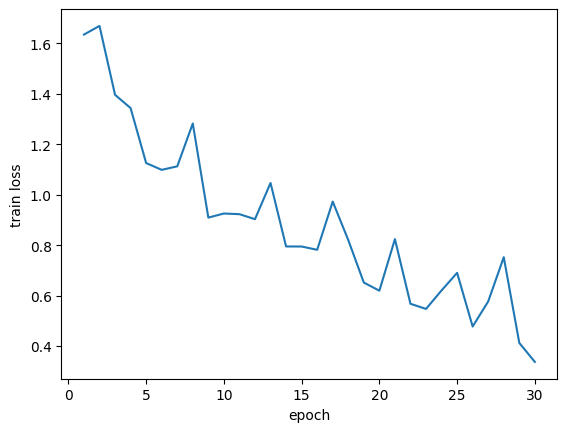

In [74]:
#plot train loss
plt.plot(range(1,num_epoch+1), list_train_loss)
plt.xlabel('epoch')
plt.ylabel('train loss')
plt.show()

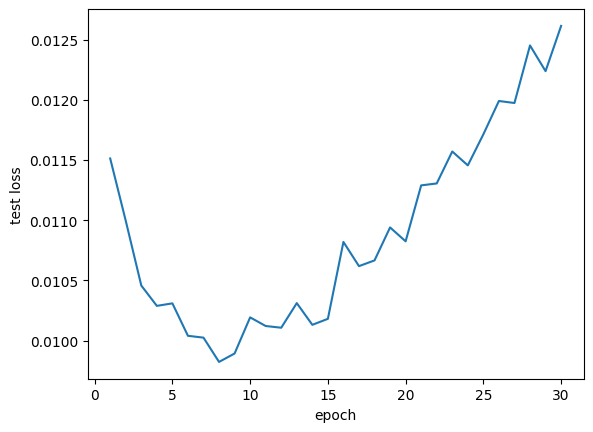

In [75]:
# plot test loss
plt.plot(range(1,num_epoch+1),list_test_loss)
plt.xlabel('epoch')
plt.ylabel('test loss')
plt.show()

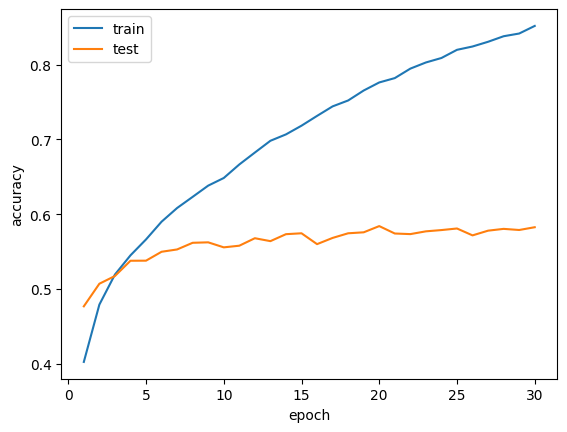

In [76]:
# plot accuracy
plt.plot(range(1,num_epoch+1),list_train_accuracy)
plt.plot(range(1,num_epoch+1),list_test_accuracy)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.show()